**Ekstraksi Garis dengan Hough Transform**

Saving Screenshot (253).jpg to Screenshot (253) (1).jpg


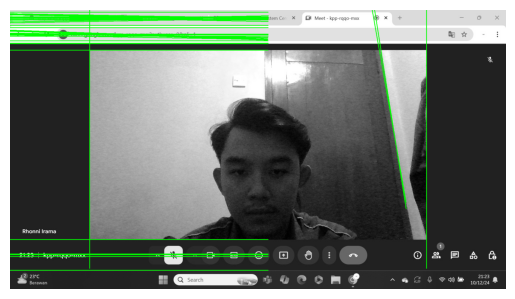

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Unggah gambar
from google.colab import files
uploaded = files.upload()

# Load the image
image = cv2.imread('Screenshot (253).jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(image, 50, 150, apertureSize=3)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the lines
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Template Matching untuk Deteksi Objek**

Saving Screenshot (253).jpg to Screenshot (253) (7).jpg


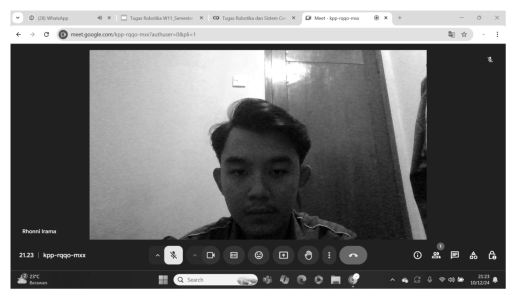

In [15]:
# Unggah gambar dan template
uploaded = files.upload()

# Load images
image = cv2.imread('Screenshot (253).jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('Screenshot (253).jpg', cv2.IMREAD_GRAYSCALE)

# Check if template dimensions are smaller than image dimensions
if template.shape[0] > image.shape[0] or template.shape[1] > image.shape[1]:
    print("Error: Template image is larger than the search image.")
    # Resize the template or select a smaller template
    # Example: template = cv2.resize(template, (width, height))
else:
    # Template matching
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Draw rectangle around detected object
    top_left = max_loc
    h, w = template.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)
    output = cv2.rectangle(image.copy(), top_left, bottom_right, 255, 2)

    plt.imshow(output, cmap='gray')
    plt.axis('off')
    plt.show()

**Pembuatan Pyramid Gambar**

Saving Screenshot (253).jpg to Screenshot (253) (8).jpg


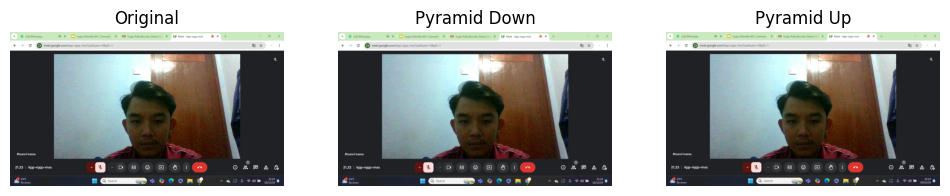

In [16]:
# Load the image
uploaded = files.upload()
image = cv2.imread('Screenshot (253).jpg')

# Create image pyramid
pyramid_down = cv2.pyrDown(image)
pyramid_up = cv2.pyrUp(image)

# Show the pyramid
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Pyramid Down")
plt.imshow(cv2.cvtColor(pyramid_down, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Pyramid Up")
plt.imshow(cv2.cvtColor(pyramid_up, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Deteksi Lingkaran Menggunakan Hough Transform**

Saving Screenshot (253).jpg to Screenshot (253) (9).jpg


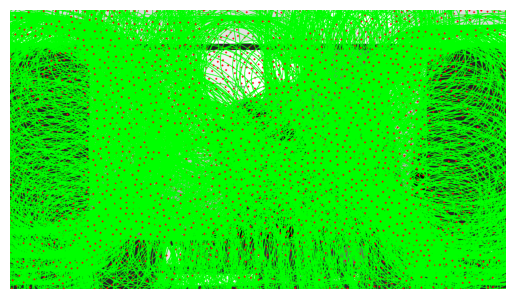

In [17]:
# Load the image
uploaded = files.upload()
image = cv2.imread('Screenshot (253).jpg', cv2.IMREAD_GRAYSCALE)
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Detect circles
circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Draw circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Ekstraksi Warna Dominan pada Gambar**

Saving Screenshot (253).jpg to Screenshot (253) (10).jpg


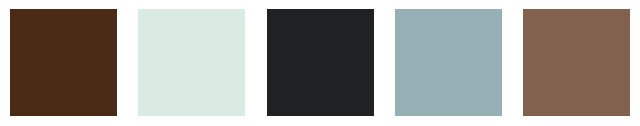

In [18]:
from sklearn.cluster import KMeans

# Load the image
uploaded = files.upload()
image = cv2.imread('Screenshot (253).jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image.reshape((-1, 3))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels)
colors = kmeans.cluster_centers_.astype(int)

# Display colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(colors):
    plt.subplot(1, 5, i + 1)
    plt.axis('off')
    plt.imshow([[color / 255]])
plt.show()

**Deteksi Kontur pada Gambar**

Saving Screenshot (253).jpg to Screenshot (253) (11).jpg


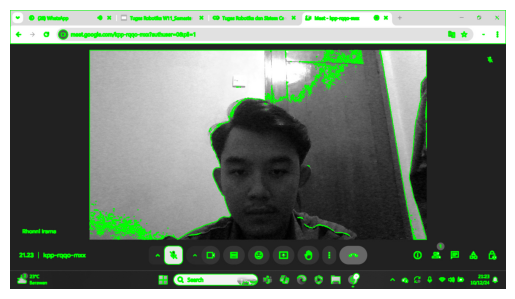

In [19]:
# Load the image
uploaded = files.upload()
image = cv2.imread('Screenshot (253).jpg', cv2.IMREAD_GRAYSCALE)
_, threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw contours
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()